<a href="https://colab.research.google.com/github/csubhodeep/sg_task/blob/main/madrid_houses_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Madrid houses dataset

## Problem description

The data set is an excerpt of Madrid houses offered on the popular website [idealista.com](https://www.idealista.com/).

The file is a comma separated text file with the following data fields:

* 'Scrap_date': Scraping date - when the data point was collected in format YYYYMMDD
* 'index': Entry ID - unique per scraping date
* 'Area': Area of the flat in square meters
* 'District': City District (normalized)
* 'Elevator_class': if an elevator is available (con) or not (sin); missing value: sin
* 'Ext_int': if the flat is exterior or interior; missing value: interior
* 'Floor_num': Floor of the flat; missing value: 0
* 'Garage_opt_inc': If an Garage is optional (opt) or included (inc); missing value: "0"
* 'Garage_price': missing value: 0; if Garage_opt_in==opt, then > 0
* 'Lat': Latitude of the flat; missing value: average 
* 'Lon': Longitude of the flat; missing value: average 
* 'New': Flat appears for the first time in this scrapping
* 'Nudo': Flat is sold as naked property
* 'Price': The price in EUR
* 'Quarter': City Quarter
* 'Rooms_num': Number of Rooms of the flat; missing value: 1
* 'Source URL': Source URL
* 'Year': Construction/Last mayor renewal; missing value: average

Note that the questions can be answered independently, some having a stronger Data Science or Data Engineer focus.

### Load data

In [ ]:
import pandas as pd
df = pd.read_csv('madrid.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# look into data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41961 entries, 0 to 41960
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Scrap_date      41961 non-null  int64  
 1   index           41961 non-null  int64  
 2   Area            41961 non-null  float64
 3   District        41961 non-null  object 
 4   Elevator_class  41961 non-null  object 
 5   Ext_int         41961 non-null  object 
 6   Floor_num       41961 non-null  float64
 7   Garage_opt_inc  41961 non-null  object 
 8   Garage_price    41961 non-null  float64
 9   Lat             41961 non-null  float64
 10  Lon             41961 non-null  float64
 11  New             30665 non-null  object 
 12  Nudo            41961 non-null  bool   
 13  Price           41961 non-null  float64
 14  Quarter         41961 non-null  object 
 15  Rooms_num       41961 non-null  float64
 16  Source URL      41961 non-null  object 
 17  Year            41961 non-null 

In [ ]:
df.head()

,Scrap_date,index,Area,District,Elevator_class,Ext_int,Floor_num,Garage_opt_inc,Garage_price,Lat,Lon,New,Nudo,Price,Quarter,Rooms_num,Source URL,Year
0,20191004,120,189.0,salamanca,con,exterior,1.0,inc,0.0,40.431277,-3.676940,NaN,False,920000.0,lista,4.0,https://www.idealista.com/inmueble/87208132/,1989.000000
1,20191004,9037,92.0,retiro,sin,exterior,2.0,0,0.0,40.412180,-3.667154,NaN,False,360000.0,estrella,3.0,https://www.idealista.com/inmueble/86718709/,1982.965873
2,20191004,9039,115.0,hortaleza,con,exterior,4.0,inc,0.0,40.488869,-3.647135,NaN,False,355000.0,sanchinarro,2.0,https://www.idealista.com/inmueble/86718422/,1982.965873
3,20191004,9048,85.0,centro,sin,exterior,2.0,0,0.0,40.423765,-3.697799,NaN,False,430000.0,chueca_justicia,2.0,https://www.idealista.com/inmueble/86717146/,1982.965873
4,20191004,9052,90.0,puente_de_vallecas,con,exterior,3.0,0,0.0,40.380525,-3.668974,NaN,False,149900.0,entrev_as,3.0,https://www.idealista.com/inmueble/86716878/,1982.965873


In [ ]:
# check how many rows have nulls
df.isna().sum()

Scrap_date            0
index                 0
Area                  0
District              0
Elevator_class        0
Ext_int               0
Floor_num             0
Garage_opt_inc        0
Garage_price          0
Lat                   0
Lon                   0
New               11296
Nudo                  0
Price                 0
Quarter               0
Rooms_num             0
Source URL            0
Year                  0
dtype: int64

The column "New" has ~25% null values

### Data pre-processing

Let's do basic type casting based on the description given above. The best data type for each column could be as following:   
* 'Scrap_date': datetime
* 'index': int
* 'Area': float
* 'District': str
* 'Elevator_class': bool
* 'Ext_int': bool
* 'Floor_num': int
* 'Garage_opt_inc': int
* 'Garage_price': float
* 'Lat': float
* 'Lon': float
* 'New': bool
* 'Nudo': bool
* 'Price': float
* 'Quarter': str
* 'Rooms_num': int
* 'Source URL': str
* 'Year': int or datetime


In [ ]:
# start explicit type conversion
schema_dict = {
    'index': int,
    'Area': float,
    'District': str,
    'Floor_num': int,
    'Garage_price': float,
    'Lat': float,
    'Lon': float,
    'New': bool,
    'Nudo': bool,
    'Price': float,
    'Quarter': str,
    'Rooms_num': int,
    'Source URL': str,
    'Year': int
}
df_new = df.astype(dtype=schema_dict)

In [ ]:
ext_int_to_bool_map = {'exterior': True, 'interior': False}
elevator_to_bool_map = {'con': True, 'sin': False}
garage_opt_inc_to_int_map = {'opt': 1, 'inc': 2, "0": 0}

In [ ]:
df_new['Ext_int'] = df['Ext_int'].apply(lambda x: ext_int_to_bool_map[x])
df_new['Elevator_class'] = df['Elevator_class'].apply(lambda x: elevator_to_bool_map[x])
df_new['Garage_opt_inc'] = df['Garage_opt_inc'].apply(lambda x: garage_opt_inc_to_int_map[x])
df_new['Scrap_date'] = pd.to_datetime(df['Scrap_date'], format="%Y%m%d")

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41961 entries, 0 to 41960
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Scrap_date      41961 non-null  datetime64[ns]
 1   index           41961 non-null  int64         
 2   Area            41961 non-null  float64       
 3   District        41961 non-null  object        
 4   Elevator_class  41961 non-null  bool          
 5   Ext_int         41961 non-null  bool          
 6   Floor_num       41961 non-null  int64         
 7   Garage_opt_inc  41961 non-null  int64         
 8   Garage_price    41961 non-null  float64       
 9   Lat             41961 non-null  float64       
 10  Lon             41961 non-null  float64       
 11  New             41961 non-null  bool          
 12  Nudo            41961 non-null  bool          
 13  Price           41961 non-null  float64       
 14  Quarter         41961 non-null  object        
 15  Ro

In [ ]:
df_new.head()

,Scrap_date,index,Area,District,Elevator_class,Ext_int,Floor_num,Garage_opt_inc,Garage_price,Lat,Lon,New,Nudo,Price,Quarter,Rooms_num,Source URL,Year
0,2019-10-04,120,189.0,salamanca,True,True,1,2,0.0,40.431277,-3.676940,True,False,920000.0,lista,4,https://www.idealista.com/inmueble/87208132/,1989
1,2019-10-04,9037,92.0,retiro,False,True,2,0,0.0,40.412180,-3.667154,True,False,360000.0,estrella,3,https://www.idealista.com/inmueble/86718709/,1982
2,2019-10-04,9039,115.0,hortaleza,True,True,4,2,0.0,40.488869,-3.647135,True,False,355000.0,sanchinarro,2,https://www.idealista.com/inmueble/86718422/,1982
3,2019-10-04,9048,85.0,centro,False,True,2,0,0.0,40.423765,-3.697799,True,False,430000.0,chueca_justicia,2,https://www.idealista.com/inmueble/86717146/,1982
4,2019-10-04,9052,90.0,puente_de_vallecas,True,True,3,0,0.0,40.380525,-3.668974,True,False,149900.0,entrev_as,3,https://www.idealista.com/inmueble/86716878/,1982


In [ ]:
# df_new.to_csv('new.csv')

Due to second time conversion of the column 'Nudo' the 'NaN' got converted to False.

One thing to note here - the size of the data decreased in the following way:   
* from 5.5 MB to 4.6 MB on RAM - 16.3% decrease
* from 7.23 MB to 6.57 MB on Disk - 9.1% decrease

Right now we can proceed with EDA as the data can be assumed to be considerably clean.

### What is the mean and median price of a house in Madrid? Why and how do they differ?   

In [ ]:
mean = df['Price'].mean()
median = df['Price'].median()
print(f"Mean price: {mean}")
print(f"Median price: {median}")

Mean price: 426010.6998641596
Median price: 270000.0


They are different because the prices have a very "skewed" distribution - meaning that there are large number of houses having low prices and very few houses having high prices. Let's check their distribution.

In [ ]:
df_new.groupby(by='Price').count()['index'].sort_values(ascending=False).head()

Price
135000.0    386
240000.0    327
175000.0    325
150000.0    325
165000.0    325
Name: index, dtype: int64

### How are the floors and square meter distributed? What kind of distribution best fits them? 

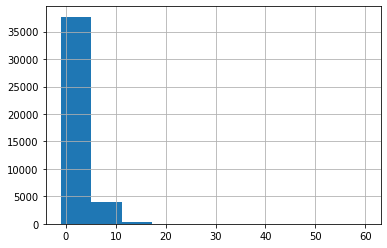

In [ ]:
# floor distribution
df_new['Floor_num'].hist()

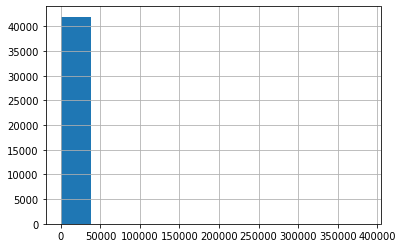

In [ ]:
# Area distribution
df_new['Area'].hist()

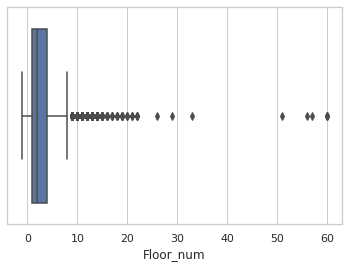

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
x = 'Floor_num'
sns.boxplot(data=df_new, x=x)

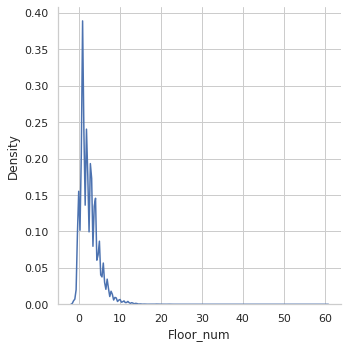

In [ ]:
sns.displot(df_new, x=x, kind='kde')

So at first it is a unimodal asymmetric distribution.     
At first it could be interpreted as a normal distribution with a high positive skewness (i.e. a long right tail). 
Howeverm, A gamma distribution with k ~ 1 and theta ~ 2 would best represent this data.
OR 
a log-normal (a.k.a log-transformed normal) distribution could best represent this data

### What factors have the strongest influence on the price? Which ones on the price per square meter? 

To understand the strongest influence on price - we could use a covariance plot w.r.t. certain features in the dataset

<BarContainer object of 11 artists>

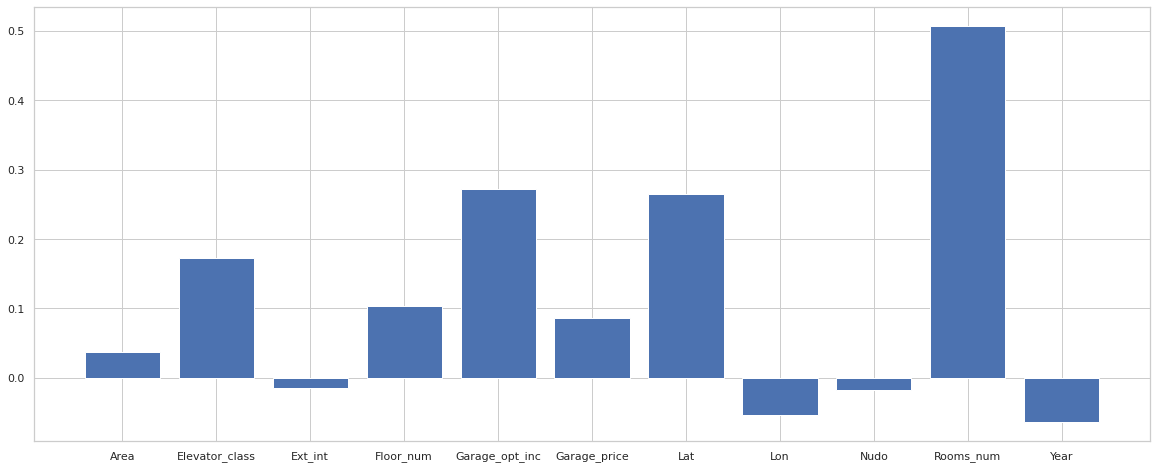

In [ ]:
import matplotlib.pyplot as plt
cols_to_correlate = [
      'Area',
      'Elevator_class',
      'Ext_int',
      'Floor_num',
      'Garage_opt_inc',
      'Garage_price',
      'Lat',
      'Lon',
      'Nudo',
      'Rooms_num',
      'Year'                   
]
corr = [df_new[[ele, 'Price']].corr().to_numpy()[0,1] for ele in cols_to_correlate]
plt.figure(figsize=[20,8])
plt.bar(cols_to_correlate, corr)

In [ ]:
# checking stats per District
df_district = df_new[['District', 'Price']].groupby(by='District')['Price'].agg(['min', 'max', 'mean', 'var'])

<BarContainer object of 21 artists>

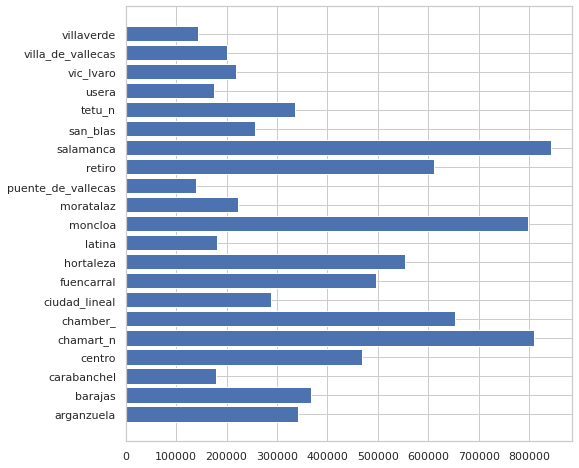

In [ ]:
plt.figure(figsize=[8, 8])
plt.barh(df_district.index, df_district['mean'])

### How has the price per square meter evolved within the last year using the scrape date as a proxy? 

In [ ]:
# find price/square-meter
df_new['price_per_sqm'] = df_new['Price']/df_new['Area']

In [ ]:
df_new['scrape_year'] = df_new['Scrap_date'].dt.year

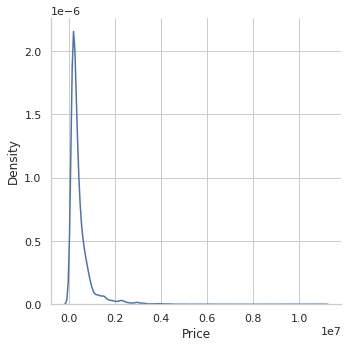

In [ ]:
sns.displot(df_new.loc[df_new['scrape_year']==2019], x='Price', kind='kde')

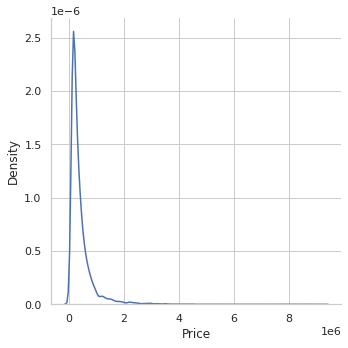

In [ ]:
sns.displot(df_new.loc[df_new['scrape_year']==2020], x='Price', kind='kde')

In [ ]:
median_2019 = df_new.loc[df_new['scrape_year']==2019]['Price'].median()
median_2020 = df_new.loc[df_new['scrape_year']==2020]['Price'].median()

In [ ]:
print(f"Median price for the data scraped in 2019: {median_2019}")
print(f"Median price for the data scraped in 2020: {median_2020}")

Median price for the data scraped in 2019: 280000.0
Median price for the data scraped in 2020: 262500.0


The median price has decreased from 2019 to 2020